In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

-------------------------------------------

QUESTION 1: PCA

------------------------------------------------

In [2]:

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape)
print(people.images.shape)

(87, 65)
(3023, 87, 65)


In [3]:
#NOTE: THESE TWO RESULTS TELL US SOME VERY USEFUL INFORMATION. WE KNOW THAT THERE ARE 3023 IMAGES AND EACH IMAGE IS 87X65 PIXELS LARGE. 

In [4]:
#NOTE: BELOW I HAVE PRINTED OUT 15 IMAGES OF LABELLED FACES FROM THE WILD DATASET.

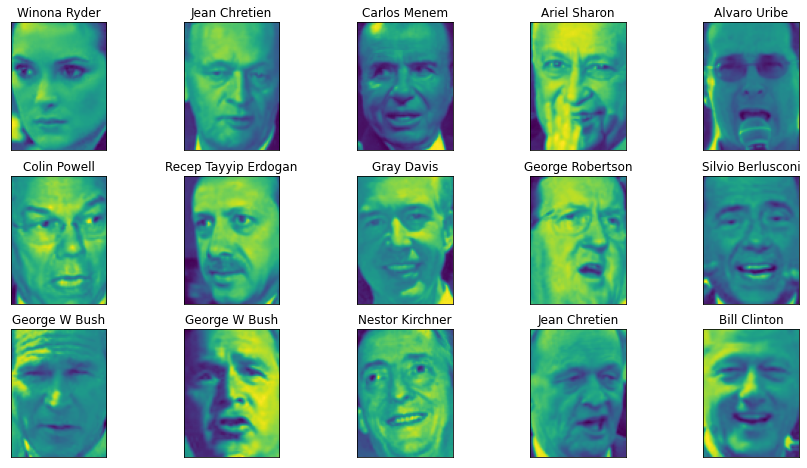

In [5]:
fix, axes = plt.subplots(3, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [6]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


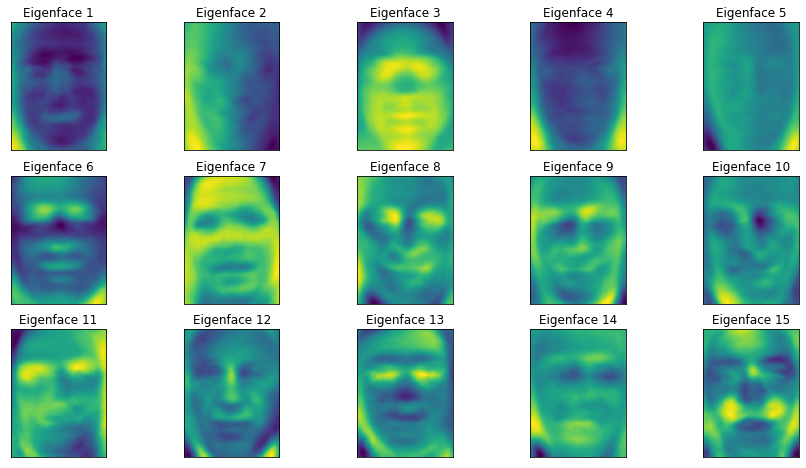

In [7]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

x_people = people.data[mask]
y_people = people.target[mask]
pca = PCA().fit(x_people)
fix, axes = plt.subplots(3, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, image, ax in zip(range(15), pca.components_, axes.ravel()):
    ax.imshow(image.reshape(87, 65))
    ax.set_title('Eigenface ' + str(i+1))

In [8]:
#NOTE: I WILL NOW PRINT OUT THE FREQUENCY OF EACH FACE IN THE DATASET AND ANALIZE THE DATA WITH REGARDS TO IT'S DISTRIBUTION. 

In [9]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end='   ')
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [10]:
#NOTE: AS YOU CAN SEE, THE DATA IS SKEWED AS IT HAS A HIGH FREQUENCY COUNT OF GEORGE W BUSH, COLLIN POWQELL, TONY BLAIR, DONALD RUMSFELD AND GERHARD SCHROEDER IN COMPARISON THE THE OTHER FREQUENCY COUNTS OF THE OTHER IMAGES.

In [11]:
#NOTE: BELOW IS A LIST OF THE NAMES BEING DISPLAYED WITHOUT THEIR FREQUENCIES. THE NAMES ARE IN ALPHABETICAL ORDER.

In [12]:
for i,name in enumerate(people.target_names):
  print(i,name)

0 Alejandro Toledo
1 Alvaro Uribe
2 Amelie Mauresmo
3 Andre Agassi
4 Angelina Jolie
5 Ariel Sharon
6 Arnold Schwarzenegger
7 Atal Bihari Vajpayee
8 Bill Clinton
9 Carlos Menem
10 Colin Powell
11 David Beckham
12 Donald Rumsfeld
13 George Robertson
14 George W Bush
15 Gerhard Schroeder
16 Gloria Macapagal Arroyo
17 Gray Davis
18 Guillermo Coria
19 Hamid Karzai
20 Hans Blix
21 Hugo Chavez
22 Igor Ivanov
23 Jack Straw
24 Jacques Chirac
25 Jean Chretien
26 Jennifer Aniston
27 Jennifer Capriati
28 Jennifer Lopez
29 Jeremy Greenstock
30 Jiang Zemin
31 John Ashcroft
32 John Negroponte
33 Jose Maria Aznar
34 Juan Carlos Ferrero
35 Junichiro Koizumi
36 Kofi Annan
37 Laura Bush
38 Lindsay Davenport
39 Lleyton Hewitt
40 Luiz Inacio Lula da Silva
41 Mahmoud Abbas
42 Megawati Sukarnoputri
43 Michael Bloomberg
44 Naomi Watts
45 Nestor Kirchner
46 Paul Bremer
47 Pete Sampras
48 Recep Tayyip Erdogan
49 Ricardo Lagos
50 Roh Moo-hyun
51 Rudolph Giuliani
52 Saddam Hussein
53 Serena Williams
54 Silvio Ber

In [13]:
#NOTE: I WILL NOW DISTRIBUTE THE DATA EVENLY BY ONLY TAKING 50 IMAGES PER PERSON. 

In [14]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
Y_people = people.target[mask]

<ipython-input-14-3686cd753769>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [15]:
scaler = StandardScaler()
scaler.fit(X_people)
scaled_data = scaler.transform(X_people)
scaled_data = X_people

In [16]:
#TOP @))PRINCIPAL COMPONENTS

In [17]:
namesArray = []
for i in range(200):
    namesArray.append('PCA component '+str(i))
principalDf = pd.DataFrame(data=X_people_pca, columns=namesArray)
principalDf.head(5)

NameError: name 'X_people_pca' is not defined

In [ ]:
#THE TOP !% PRINCIPAL COMPONENTS

In [ ]:
pca=PCA(n_components=15) 
principalComponents=pca.fit_transform(X_people) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1',
                                                           'principal component 2', 
                                                          'principal component 3',
                                                          'principal component 4',
                                                          'principal component 5',
                                                          'principal component 6',
                                                          'principal component 7',
                                                          'principal component 8',
                                                          'principal component 9',
                                                          'principal component 10',
                                                          'principal component 11',
                                                          'principal component 12',
                                                          'principal component 13',
                                                          'principal component 14',
                                                          'principal component 15']) 
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15
0,-853.169434,1142.715820,-214.548813,311.973511,-154.002975,225.835510,309.899933,1134.763916,344.545685,825.257629,-334.695526,-273.149017,-507.536407,387.736481,320.475433
1,-220.666046,1316.550537,-33.392246,-1487.798340,455.822906,633.054688,-448.162415,-357.191101,738.230530,-125.649422,524.778687,131.945694,-98.718513,-299.288239,-40.835052
2,2400.738037,-1026.941528,-609.711304,-1350.389771,-5.904982,766.187805,492.705933,-116.794281,541.865723,195.588531,-622.070435,121.817650,41.715389,-402.400787,-193.976486
3,-860.465576,892.768677,-257.286804,-1395.751709,1005.808838,8.487967,-666.884521,-347.893188,-669.133423,531.808594,655.583191,110.894691,-126.137756,68.791351,-6.021506
4,1522.592163,406.038940,-587.482361,802.296387,462.715820,-510.980652,315.386230,-384.831512,587.114441,731.093994,-85.362961,-463.488129,29.030918,-8.569397,159.487442


In [ ]:
#NOTE: BELOW IS THE FIRST FACE.

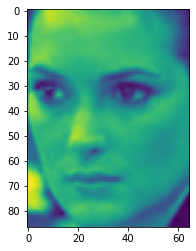

In [ ]:
# i in scaled_data:


first_image = np.array(scaled_data[0])
newFirst_image = first_image.reshape(87,65)
plt.imshow(newFirst_image)



In [ ]:
#NOTE: BELOW IS THE PCA CALCULATION BEING PERFORMED.

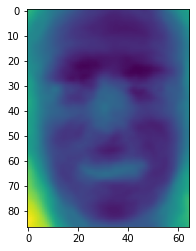

In [ ]:
n_components = 2063
pca = PCA(n_components=2063, svd_solver='randomized', whiten=True).fit(X_people)
eigenFace = pca.components_.reshape((n_components, 87, 65))
X_peepsAfterPCA = pca.transform(X_people)
plt.imshow( pca.components_[0].reshape(people.images[0].shape))


In [ ]:
#NOTE: BELOW IS A GRAPH THAT HAS BEEN PLOTTED THAT EXPLAINS THE VARIANCE AS THE NUMBER OF COMPONENTS INCREASE. AS YOU CAN SEE, EVENTUALLY THE GRAPH STARTS TO BECOME CONSTANT. THIS MEANS THAT AFTER A CERTAIN NUMBER OF COMPONENTS, THE IMAGE CLARITY WILL NOT INCREASE WITH THE INCREASE OF THE NUMBER OF COMPONENTS.

(array([ 193,  194,  195, ..., 2060, 2061, 2062]),)

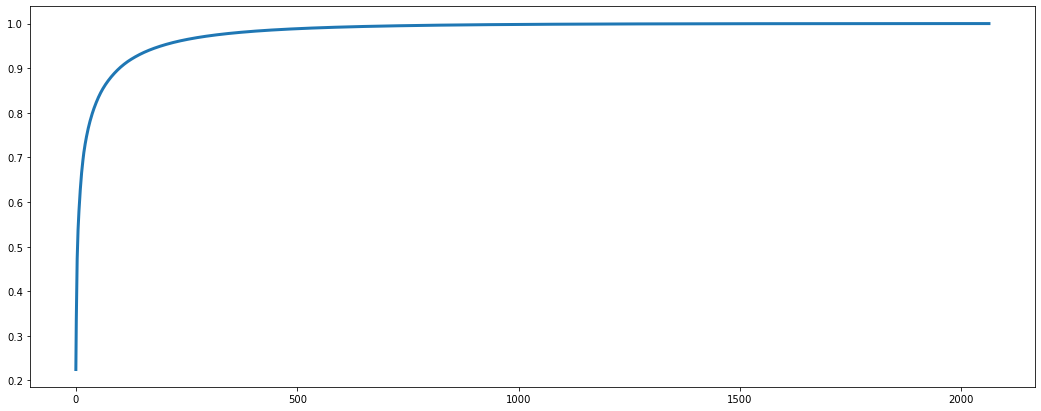

In [ ]:


pca = PCA().fit(X_people)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

np.where(pca.explained_variance_ratio_.cumsum() > 0.95)

In [ ]:
#NOTE: BELOW I HAVE PRINTED OUT THE TOP K COMPONENTS WITH THE VARIANCE AS WELL WHEN X > 95% OR 0.95.

In [ ]:
pcaRRR = pca.explained_variance_ratio_.cumsum()
numpyPCARRR = np.array(pcaRRR)
numpyPCARRR.shape
i=0
for x in numpyPCARRR:
    i = i + 1
    if x > 0.95:
        print(" The top K number of components results in: ",i, " and the variance is " ,x)
        break


In [ ]:
#NOTE: BELOW I WILL BE REDRAWING THE FACE WITH DIFFERENT COMPONENT VALUES. 

In [ ]:
#NOTE: I WILL FIRST DRAW THE IMAGE WITH THE NUMBER OF COMPONENTS BEING 10. MY ASSUMPTION IS THAT THIS IMAGE SHOULD NOT BE VERY CLEAR AT ALL.

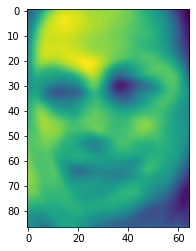

In [ ]:
pca=PCA(n_components=10)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#NOTE: I WILL NOW INCREASE THE NUMBER OF COMPONENTS TO 30. THIS SHOULD MAKE A CLEAR VISUAL DIFFERENCE WHEN COMPARED TO THE IMAGE WITH 10 COMPONENTS OR ANY IMAGE THAT HAS COMPONENTS LESS THAT 30.

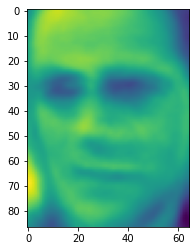

In [ ]:
pca=PCA(n_components=30)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#OBSERVATION:YOU CAN SEE THAT THE IMAGE HAS BECOME SHARPER.IT IS NOT EASILY RECOGNIZED, BUT IF YOU OBSERVE CLOSELY AT THE EYES AND MOUTH REGION, YOU CAN SEE THAT THE IMAGE CLARITY HAS INCREASED. 

In [ ]:
#NOTE: I WILL NOW INCREASE THE NUMBER OF COMPONENTS TO 50. THIS SHOULD MAKE A CLEAR VISUAL DIFFERENCE WHEN COMPARED TO THE IMAGE WITH 10 COMPONENTS OR ANY IMAGE THAT HAS COMPONENTS LESS THAT 50.

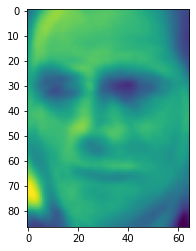

In [ ]:
pca=PCA(n_components=50)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#NOTE: I WILL NOW INCREASE THE NUMBER OF COMPONENTS TO 100. THIS SHOULD MAKE A CLEAR VISUAL DIFFERENCE WHEN COMPARED TO THE IMAGE WITH 10 COMPONENTS OR ANY IMAGE THAT HAS COMPONENTS LESS THAT 100.

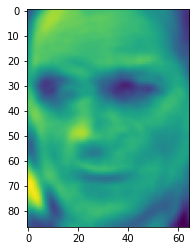

In [ ]:
pca=PCA(n_components=100)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#NOTE: I WILL NOW INCREASE THE NUMBER OF COMPONENTS TO 500. THIS SHOULD MAKE A CLEAR VISUAL DIFFERENCE WHEN COMPARED TO THE IMAGE WITH 10 COMPONENTS OR ANY IMAGE THAT HAS COMPONENTS LESS THAT 500.

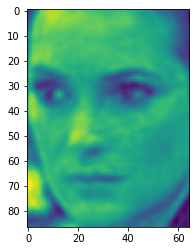

In [ ]:
pca=PCA(n_components=500)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#NOTE: I WILL NOW INCREASE THE NUMBER OF COMPONENTS TO 1000. THIS SHOULD MAKE A CLEAR VISUAL DIFFERENCE WHEN COMPARED TO THE IMAGE WITH 10 COMPONENTS OR ANY IMAGE THAT HAS COMPONENTS LESS THAT 1000.

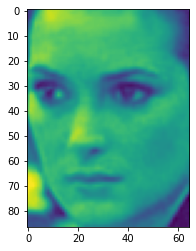

In [ ]:
pca=PCA(n_components=1000)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#NOTE: I WILL NOW INCREASE THE NUMBER OF COMPONENTS TO 2000. THIS SHOULD MAKE A CLEAR VISUAL DIFFERENCE WHEN COMPARED TO THE IMAGE WITH 10 COMPONENTS OR ANY IMAGE THAT HAS COMPONENTS LESS THAT 2000.

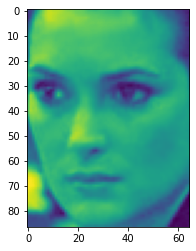

In [ ]:
pca=PCA(n_components=2000)
eigenfaces = pca.fit_transform(X_people)
X_inv_eigenFaces = pca.inverse_transform(eigenfaces)
X_inv_eigenFacesNP = np.array(X_inv_eigenFaces)
X_inv_eigenFacesNP.shape
X_img = np.reshape(X_inv_eigenFaces, (2063, 87,65))
plt.imshow(X_img[0])

In [ ]:
#FINAL OBSERVATIONS: AS YOU CAN SEE, AS THE OVERALL AMOUNT OF COMPONENTS INCREASED, THE SHARPNESS OF THE IMAGE ALSO INCREASED.

---------------------------------

QUESTION 2: NEURAL NETWORKS

--------------------------------

In [ ]:
#import all the numpy datasets

In [ ]:
test_label = np.load('test_label.npy')
test_set = np.load('test_set.npy')
train_label = np.load('train_label.npy')
train_set = np.load('train_set.npy')

In [ ]:
#print them all to see the data inside

In [ ]:
print(test_label)

[6 4 2 8 1 3 3 8 6 5 4 6 5 9 6 7 8 8 6 3 1 0 1 7 1 9 6 1 2 7 9 9 3 7 5 7 1
 9 1 5 1 3 7 3 4 4 2 2 0 0 9 9 1 2 5 3 9 5 9 3 1 3 5 6 7 0 8 7 1 6 5 3 1 6
 5 0 3 4 1 0 7 7 1 0 6 1 5 5 5 2 7 8 8 0 6 2 0 1 4 0 6 8 9 1 7 6 8 3 1 4 2
 2 3 2 3 1 8 2 7 4 0 5 0 9 3 1 3 1 3 8 6 5 7 3 4 4 0 5 8 2 6 7 3 3 9 9 6 2
 6 0]


In [ ]:
print(test_set)

[[132.33333  169.33333  172.66667  ... 253.66667  252.       250.33333 ]
 [117.333336 111.666664  98.666664 ... 234.       235.       218.33333 ]
 [115.333336 110.666664 100.333336 ... 144.       154.       166.66667 ]
 ...
 [ 30.333334  21.333334  12.666667 ... 137.33333  140.33333  138.33333 ]
 [164.       163.33333  160.33333  ...  56.333332  60.666668  61.666668]
 [ 33.333332  38.        45.333332 ...  91.666664  85.        81.      ]]


In [ ]:
print(train_label)

[2 6 4 3 8 2 8 2 1 6 9 0 2 3 9 4 2 8 9 0 6 4 9 6 2 3 3 4 6 3 7 6 0 2 1 1 5
 5 0 3 9 0 2 0 2 5 7 5 1 1 2 4 9 2 9 5 6 1 2 7 3 5 8 4 0 7 9 9 1 2 0 2 9 1
 9 6 9 5 5 4 1 6 9 8 9 1 4 5 3 4 7 8 3 6 9 8 2 1 8 8 6 4 4 0 8 5 1 0 9 7 7
 4 4 8 4 3 4 3 9 9 8 5 7 6 3 5 1 4 0 8 0 8 4 5 4 5 7 0 7 2 9 0 2 9 3 1 9 1
 2 5 1 1 4 0 7 2 2 4 5 2 4 8 8 3 5 0 0 3 9 4 0 4 0 1 2 0 4 9 0 6 7 3 3 7 2
 6 1 9 8 0 6 7 5 2 0 5 4 6 4 7 4 7 7 4 0 8 5 7 3 7 3 1 0 2 4 8 3 5 0 4 5 9
 2 6 7 4 8 8 4 0 8 2 9 7 9 5 3 8 9 5 4 4 8 0 3 3 5 8 5 7 7 6 1 6 7 3 0 8 2
 6 1 9 5 5 2 8 3 9 8 0 7 6 3 1 5 0 5 6 1 6 9 6 8 4 3 7 7 2 9 0 2 4 8 7 6 6
 9 6 8 6 8 7 6 7 2 7 0 8 5 9 3 4 5 2 0 4 6 7 2 1 8 6 0 4 5 9 7 5 7 2 4 6 3
 8 3 5 1 8 8 2 9 7 1 9 1 0 2 8 1 6]


In [ ]:
print(train_set)

[[ 52.666668  45.        34.666668 ... 165.66667  183.       190.33333 ]
 [101.666664 104.       111.       ... 163.       172.33333  176.      ]
 [ 93.666664  69.666664  73.       ... 186.33333  113.666664  27.333334]
 ...
 [129.       128.66667  126.666664 ...  63.666668  64.        64.666664]
 [ 76.666664  84.333336  89.666664 ... 252.33333  251.66667  246.      ]
 [ 72.333336  94.       102.333336 ... 130.33333  129.33333  137.33333 ]]


In [ ]:
y_train = []
y_train_b = []
for i in range(train_label.shape[0]):
    for j in range(10):
        y_train.append(0)
    y_train_b.append(y_train)
    y_train = []
    

y_train_b = np.array(y_train_b)
y_train_b.shape 

(350, 10)

In [ ]:

for i in range(train_label.shape[0]):
    y_train_b[i][train_label[i] - 1] = 1
    
y_train = y_train_b
y_train = y_train.T
y_train.shape

In [ ]:
y_train_a = []
y_train_b = []
for i in range(test_label.shape[0]):
    for j in range(10):
        y_train_a.append(0)
    y_train_b.append(y_train_a)
    y_train_a = []
    

y_train_b = np.array(y_train_b)
y_train_b.shape  

for i in range(test_label.shape[0]):
    y_train_b[i][test_label[i] - 1] = 1
    
y_test = y_train_b
print(y_test.shape)
y_test = y_test.T

(150, 10)


In [ ]:
#DEFINING A FEW FUNCTIONS. THESE FUNCTIONS ALL OUTPUT NUMBERS IN A RANGE OF 0-1

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
  return  np.tanh(x)

def grad_tanh(x):
  return 1 - np.tanh(x)**2 

In [ ]:
pca=PCA(n_components=100)
pca = pca.fit(train_set)
X_pca_train=pca.transform(train_set)
X_pca_test=pca.transform(test_set)

X_pca_train.shape

(350, 100)

In [ ]:
reducedTraingSet = X_pca_train
reducedTestSet = X_pca_test

scaler = StandardScaler()
scaler.fit(reducedTraingSet)
scaled_data_train = scaler.transform(reducedTraingSet)
scaled_data_train = scaled_data_train.T

print(scaled_data_train.shape)

scaler.fit(reducedTestSet)
scaled_data_test = scaler.transform(reducedTestSet)
scaled_data_test = scaled_data_test.T

n_h = 250
N = scaled_data_train.shape[1]
D = scaled_data_train.shape[0]

print(D)

W_1 = np.random.randn(n_h,D)*0.01
b_1 = np.random.randn(n_h,1)*0.01

#15*5655 x 5655*350
#15*350

W_2 = np.random.randn(10,n_h)*0.01
#1*15
b_2 = np.random.randn(1,1)*0.01

(100, 350)
100


In [ ]:
for iteration in range(500):
    # forward propagation
    Z_1 = np.matmul(W_1,scaled_data_train) + b_1
    A_1 = tanh(Z_1)
    Z_2 = np.matmul(W_2,A_1) + b_2
    
    A_2 = sigmoid(Z_2)            # Prediction
    
    
    cost =(1/N) * np.sum(-y_train * np.log(A_2) - (1-y_train)* np.log(1 - A_2))
        
    # backward propagation    
    dZ_2 = A_2 - y_train

    dZ_1 = np.matmul(W_2.T,dZ_2) * grad_tanh(Z_1)
    dW_2 = (1/N) * np.matmul(dZ_2,A_1.T)
    dW_1 = (1/N) * np.matmul(dZ_1,scaled_data_train.T)
    db_2 = (1/N) * np.sum(dZ_2,axis=1,keepdims=True)
    db_1 = (1/N) * np.sum(dZ_1,axis=1,keepdims=True)

    W_1 = W_1 - 0.01*dW_1
    W_2 = W_2 - 0.01*dW_2
    
    b_1 = b_1 - 0.01*db_1
    b_2 = b_2 - 0.01*db_2
    
    

    # Train set set accuracy
    # forward propagation
    Z_1 = np.matmul(W_1,scaled_data_train) + b_1
    A_1 = tanh(Z_1)
    Z_2 = np.matmul(W_2,A_1) + b_2
    A_2 = sigmoid(Z_2)            
    y_train_pred = (A_2 > 0.5).astype(np.int_).flatten()
    train_accuracy = accuracy_score( y_train.flatten(),y_train_pred)



    # Test set set accuracy
    # forward propagation
    Z_1 = np.matmul(W_1,scaled_data_test) + b_1
    A_1 = tanh(Z_1)
    Z_2 =  np.matmul(W_2,A_1) + b_2
    A_2 = sigmoid(Z_2)     
    print( scaled_data_test.shape)
    y_test_pred = (A_2 > 0.5).astype(np.int_).flatten()
    print( y_test.shape)
    test_accuracy = accuracy_score( y_test.flatten(),y_test_pred)
  
    print("Iteration: {}".format(iteration)," Cost: {:02f}".format(cost)," Training accuracy : {:02f}".format(train_accuracy)," Test accuracy: {:02f}".format(test_accuracy))

)
(10, 150)
Iteration: 313  Cost: 3.539118  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 314  Cost: 3.533477  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 315  Cost: 3.527881  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 316  Cost: 3.522330  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 317  Cost: 3.516825  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 318  Cost: 3.511364  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 319  Cost: 3.505948  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 320  Cost: 3.500576  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 321  Cost: 3.495248  Training accuracy : 0.900000  Test accuracy: 0.900000
(100, 150)
(10, 150)
Iteration: 322  Cost: 3.4